<a href="https://colab.research.google.com/github/Kruglikle/EduText-Analyzer/blob/main/Text_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Токенизация

In [ ]:
!pip install spacy pandas
!python -m spacy download en_core_web_sm #модель для англ яз


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 126.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
import pandas as pd

#Загружаем модель spaCy
nlp = spacy.load("en_core_web_sm")

#Загружаем файл с текстами
df = pd.read_excel("texts-spotlight-8.xlsx")   # если Excel
# df = pd.read_csv("texts.csv", encoding="utf-8")  # если CSV

# Функции токенизациb

# Только слова (чистая лексика)
def tokenize_words(text):
    doc = nlp(str(text))
    return [token.text.lower() for token in doc if token.is_alpha]

# С пунктуацией (для восстановления предложений)
def tokenize_with_punct(text):
    doc = nlp(str(text))
    return [token.text for token in doc if not token.is_space]

# Формируем первую таблицу (только слова)
rows_words = []
for _, row in df.iterrows():
    klass = row["Класс"]
    tokens = tokenize_words(row["Текст"])
    for token in tokens:
        rows_words.append({"Класс": klass, "Токен": token})

tokens_words_df = pd.DataFrame(rows_words)

# Формируем вторую таблицу (со знаками препинания)
rows_punct = []
for _, row in df.iterrows():
    klass = row["Класс"]
    tokens = tokenize_with_punct(row["Текст"])
    for token in tokens:
        rows_punct.append({"Класс": klass, "Токен": token})

tokens_punct_df = pd.DataFrame(rows_punct)

# Сохраняем рез-ы
tokens_words_df.to_csv("tokens_words.csv", index=False, encoding="utf-8-sig")
tokens_words_df.to_excel("tokens_words.xlsx", index=False)

tokens_punct_df.to_csv("tokens_with_punct.csv", index=False, encoding="utf-8-sig")
tokens_punct_df.to_excel("tokens_with_punct.xlsx", index=False)

print("Готово!")
print("Таблица слов: tokens_words.xlsx")
print("Таблица с пунктуацией: tokens_with_punct.xlsx")


Готово!
Таблица слов: tokens_words.xlsx
Таблица с пунктуацией: tokens_with_punct.xlsx


Здесь только одна таблица

In [ ]:
import spacy
import pandas as pd

# Загружаем модель spaCy
nlp = spacy.load("en_core_web_sm")

#  Загружаем файл с текстами
# Можно читать .csv или .xlsx — закомментируй лишнее
df = pd.read_excel("texts-spotlight-6.xlsx")   # если Excel
# df = pd.read_csv("texts.csv", encoding="utf-8")  # если CSV

#  Функция токенизации
def tokenize_text(text):
    doc = nlp(str(text))  # превращаем в строку на всякий случай
    return [token.text.lower() for token in doc if token.is_alpha]

#Создаём таблицу токенов по всем текстам
rows = []
for _, row in df.iterrows():
    klass = row["Класс"]
    tokens = tokenize_text(row["Текст"])
    for token in tokens:
        rows.append({"Класс": klass, "Токен": token})

tokens_df = pd.DataFrame(rows)

# Сохраняем результат
tokens_df.to_csv("tokens_all.csv", index=False, encoding="utf-8-sig")
tokens_df.to_excel("tokens_all.xlsx", index=False)

print("Токены сохранены в tokens_all.csv и tokens_all.xlsx")
print(tokens_df.head())


Токены сохранены в tokens_all.csv и tokens_all.xlsx
   Класс      Токен
0      1  spotlight
1      1         on
2      1     russia
3      1      looks
4      1         at


Библиотека textstat в Python — это инструмент для автоматического анализа читаемости текста. Она предоставляет функции для оценки, насколько легко или сложно читать текст, используя различные метрики (например, Flesch Reading Ease, Gunning Fog, SMOG, и др.).

| Метод                                         | Что измеряет                                                       |
| --------------------------------------------- | ------------------------------------------------------------------ |
| `textstat.flesch_reading_ease(text)`          | Оценка читаемости по шкале Флеша (чем выше, тем легче читать)      |
| `textstat.flesch_kincaid_grade(text)`         | Класс школьника, которому будет понятен текст                      |
| `textstat.smog_index(text)`                   | Оценка сложности для восприятия (подходит для мед. и тех. текстов) |
| `textstat.gunning_fog(text)`                  | Количество лет образования, нужное для понимания                   |
| `textstat.automated_readability_index(text)`  | Уровень читаемости по количеству символов                          |
| `textstat.dale_chall_readability_score(text)` | Использует список знакомых слов для оценки сложности               |
| `textstat.lexicon_count(text)`                | Количество слов                                                    |
| `textstat.syllable_count(text)`               | Количество слогов                                                  |
| `textstat.sentence_count(text)`               | Количество предложений                                             |


| Метод                                | Диапазон значений | Единицы                     | Интерпретация                                                     |
| ------------------------------------ | ----------------- | --------------------------- | ----------------------------------------------------------------- |
| `flesch_reading_ease(text)`          | **0 – 100+**      | Баллы (чем выше, тем легче) | > 90 — очень легко (5-й класс), < 30 — очень сложно (университет) |
| `flesch_kincaid_grade(text)`         | \~0 – 12+         | Класс/грейд (США)           | 5.0 — 5 класс, 12.0 — выпускной класс, >12 — ВУЗ                  |
| `smog_index(text)`                   | \~3 – 18+         | Лет образования             | ≥12 — сложный текст, <6 — простой                                 |
| `gunning_fog(text)`                  | \~6 – 20+         | Лет образования             | >12 — сложно, <8 — просто                                         |
| `automated_readability_index(text)`  | \~0 – 14+         | Класс/грейд (США)           | 3 — легко, 12 — сложно                                            |
| `dale_chall_readability_score(text)` | **4.9 – 10+**     | Баллы                       | <5 — легко (≥80% слов знакомы), >8 — сложно                       |
| `lexicon_count(text)`                | ≥ 0               | Кол-во слов                 | Просто количество слов в тексте                                   |
| `syllable_count(text)`               | ≥ 0               | Кол-во слогов               | Считаются слоги во всех словах                                    |
| `sentence_count(text)`               | ≥ 0               | Кол-во предложений          | Просто количество предложений                                     |


Как работает внутри?
Tokenizer: textstat разбивает текст на слова, предложения, слоги.

Подсчёты: Затем считает количество: слов, предложений, слогов

Формулы: На основе этих подсчётов применяет формулы читаемости. Например, Flesch Reading Ease:

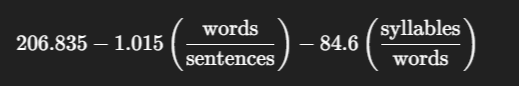

📌 Примечания
textstat хорошо работает с английским языком. Для других языков (включая русский) работает плохо или некорректно — из-за распознавания слогов, слов и частотных списков.

Он не использует NLP-модели — это легковесная, формульная библиотека.

In [ ]:
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.2/239.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import textstat

# Загружаем таблицу (поддерживает .csv или .xlsx)
file_path = "texts-spotlight-8.xlsx"  # путь к твоей таблице с колонками "Класс" и "Текст"
df = pd.read_excel(file_path) if file_path.endswith(".xlsx") else pd.read_csv(file_path)

results = []

for _, row in df.iterrows():
    klass = row["Класс"]
    text = str(row["Текст"]) if not pd.isna(row["Текст"]) else ""

    metrics = {
        "Класс": klass,
        "Flesch Reading Ease": textstat.flesch_reading_ease(text),
        "Flesch-Kincaid Grade": textstat.flesch_kincaid_grade(text),
        "SMOG Index": textstat.smog_index(text),
        "Gunning Fog Index": textstat.gunning_fog(text),
        "Automated Readability Index": textstat.automated_readability_index(text),
        "Dale-Chall Score": textstat.dale_chall_readability_score(text),
        "Total words": textstat.lexicon_count(text),
        "Total sentences": textstat.sentence_count(text),
        "Total syllables": textstat.syllable_count(text)
    }
    results.append(metrics)

df_out = pd.DataFrame(results)
df_out.to_excel("textstat_results-6.xlsx", index=False)
print("Готово. Результаты сохранены в textstat_results.xlsx")


Готово. Результаты сохранены в textstat_results.xlsx


По шкале CEFR

In [ ]:
import pandas as pd
import csv
import spacy
from collections import Counter

# Настройка
text_file = "texts-spotlight-8.xlsx"       # таблица с колонками "Класс", "Текст"
cefr_file = "len_cefr.csv"     # словарь слово - уровень
agg_output = "cefr_by_class.xlsx"
wordlist_output = "cefr_wordlist.xlsx"

#Загружаем CEFR словарь
cefr_order = {'A1': 1, 'A2': 2, 'B1': 3, 'B2': 4, 'C1': 5, 'C2': 6}

word_levels = {}
with open(cefr_file, encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        word = row['Word'].strip().lower()
        level = row['CEFR Level'].strip().upper()
        if word not in word_levels or cefr_order.get(level, 7) < cefr_order.get(word_levels[word], 7):
            word_levels[word] = level

#Загружаем модель spaCy
nlp = spacy.load("en_core_web_sm")

# Читаем таблицу с текстами
df = pd.read_excel(text_file) if text_file.endswith(".xlsx") else pd.read_csv(text_file)

# Данные для двух таблиц
class_results = []  # агрегированные
wordlist_rows = []  # полный список

for klass, group in df.groupby("Класс"):
    all_words = []
    for text in group["Текст"]:
        doc = nlp(str(text))
        words = [token.text.lower() for token in doc if token.is_alpha]
        all_words.extend(words)

    # Для агрегата берём только уникальные слова
    unique_words = set(all_words)

    # Подсчёт уровней по уникальным словам (агрегат)
    unique_levels = [word_levels.get(w, "unknown") for w in unique_words]
    counts = Counter(unique_levels)
    total_unique = sum(counts.values())

    row = {"Класс": klass}
    for level in ["A1", "A2", "B1", "B2", "C1", "C2", "unknown"]:
        count = counts.get(level, 0)
        row[level] = count
        row[f"{level}_%"] = round((count / total_unique * 100), 1) if total_unique > 0 else 0
    class_results.append(row)

    # Для wordlist считаем частоты (с повторениями)
    word_freq = Counter(all_words)
    for w, freq in word_freq.items():
        wordlist_rows.append({
            "Класс": klass,
            "Слово": w,
            "CEFR": word_levels.get(w, "unknown"),
            "Частота": freq
        })

# Сохраняем агрегированные данные
df_out = pd.DataFrame(class_results).sort_values("Класс")
df_out.to_excel(agg_output, index=False)

# Сохраняем полный список слов с частотами
df_words = pd.DataFrame(wordlist_rows).sort_values(["Класс", "Слово"])
df_words.to_excel(wordlist_output, index=False)

print(f"Агрегированные данные сохранены в {agg_output}")
print(f"Полный список слов сохранён в {wordlist_output}")


Агрегированные данные сохранены в cefr_by_class.xlsx
Полный список слов сохранён в cefr_wordlist.xlsx


!проблема - много unknown

По Левенштейну

In [ ]:
!pip install python-Levenshtein
!pip install transliterate
!pip install deep-translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import spacy
from deep_translator import GoogleTranslator

input_file = 'texts-spotlight-8.xlsx'  # входной файл с колонками "Класс" и "Текст"
output_file = 'translation_by_class.xlsx'

nlp = spacy.load("en_core_web_sm")
translator = GoogleTranslator(source='en', target='ru')

# Читаем Excel
df = pd.read_excel(input_file)

rows = []

# Группируем по классу
for klass, group in df.groupby('Класс'):
    unique_words = set()
    for text in group['Текст']:
        if pd.isna(text):
            continue
        doc = nlp(str(text))
        words = [token.text.lower() for token in doc if token.is_alpha]
        unique_words.update(words)

    for word in sorted(unique_words):
        try:
            translation = translator.translate(word)
        except Exception as e:
            translation = "Ошибка перевода"
            print(f"Ошибка при переводе '{word}': {e}")
        rows.append({'Класс': klass, 'Слово': word, 'Перевод': translation})

# Создаем DataFrame и сохраняем в Excel
df_out = pd.DataFrame(rows)
df_out.to_excel(output_file, index=False)

print(f"Файл с переводами сохранён: {output_file}")

Файл с переводами сохранён: translation_by_class.xlsx


Берём английское слово из столбца Фраза (например, cat).

Берём русский перевод из столбца Перевод (например, кот).

Транслитерируем русский перевод в английские буквы (кот → kot).

Сравниваем английское слово (cat) и транслитерированный перевод (kot) через Levenshtein.ratio — метрику, показывающую, насколько строки похожи (от 0 до 1).

Если результат близок к 1.0, то это почти точная калька по звучанию (например, bus ↔ бас), а если ближе к 0, то перевод по звучанию не похож (cat ↔ кот).

In [ ]:
import pandas as pd
import Levenshtein
from transliterate import translit

# Загрузка данных из файла с колонками Класс, Слово, Перевод
df = pd.read_excel('translation_by_class.xlsx')  # или .csv, если нужен другой формат

# Проверяем наличие столбцов
assert {'Класс', 'Слово', 'Перевод'}.issubset(df.columns), "Отсутствуют нужные столбцы"

# Функция транслитерации с русского на английский (обратная транслитерация)
def transliterate_ru_to_en(word_ru):
    try:
        return translit(word_ru, 'ru', reversed=True)
    except Exception:
        return ''

# Функция вычисления схожести Levenshtein ratio
def calc_similarity(word_en, translation_ru):
    translation_en = transliterate_ru_to_en(str(translation_ru)).lower()
    return Levenshtein.ratio(str(word_en).lower(), translation_en)

# Добавляем столбец со схожестью
df['similarity'] = df.apply(lambda row: calc_similarity(row['Слово'], row['Перевод']), axis=1)

# Сохраняем в Excel с новым столбцом
df.to_excel('translation_with_similarity.xlsx', index=False)

# Вывод примера и среднее значение
print(df[['Класс', 'Слово', 'Перевод', 'similarity']].head(20))
print(f"\nСредняя схожесть (Levenshtein ratio): {df['similarity'].mean():.4f}")


    Класс     Слово     Перевод  similarity
0       1         a           а    1.000000
1       1      also       также    0.200000
2       1        an      анонца    0.444444
3       1       and           и    0.000000
4       1  anything    что-либо    0.235294
5       1       are    являются    0.133333
6       1    arrive   приезжать    0.375000
7       1     asked     спросил    0.166667
8       1        at           в    0.000000
9       1       bad      плохой    0.000000
10      1        be        быть    0.333333
11      1   because  потому что    0.111111
12      1    bottle     бутылка    0.461538
13      1       box     коробка    0.200000
14      1     bunch      связка    0.000000
15      1       buy      купить    0.222222
16      1      cake        торт    0.000000
17      1    called  называется    0.235294
18      1       can       может    0.000000
19      1  casually    случайно    0.352941

Средняя схожесть (Levenshtein ratio): 0.3154


LexicalRichness

In [ ]:
!pip install lexicalrichness


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lexicalrichness: filename=lexicalrichness-0.5.1-py3-none-any.whl size=15418 sha256=0fcd808873bef8e238ad0371cc8f67b6730c288a9d5cff08994b9f401020f351
  Stored in directory: /root/.cache/pip/wheels/eb/40/d0/053edb84485f223effdbf0f91fc2b6ec6fc6cf2230aadca09a
Successfully built lexicalrichness


In [ ]:
import pandas as pd
import spacy
from lexicalrichness import LexicalRichness

# Файл с текстами
input_texts = 'texts-spotlight-8.xlsx'  # с колонками "Класс" и "Текст"
output_file = 'ttr_by_class.xlsx'

# Загружаем spaCy (если нужна для токенизации, но lexicalrichness сам работает с текстом)
# nlp = spacy.load("en_core_web_sm")

# Читаем тексты
df = pd.read_excel(input_texts)

results = []

for klass, group in df.groupby('Класс'):
    all_text = " ".join(str(t) for t in group['Текст'].dropna())
    lex = LexicalRichness(all_text)
    results.append({'Класс': klass, 'TTR': lex.ttr})

df_out = pd.DataFrame(results).sort_values('Класс')
df_out.to_excel(output_file, index=False)

print(f"TTR по классам сохранён в {output_file}")
print(df_out)


TTR по классам сохранён в ttr_by_class.xlsx
   Класс       TTR
0      1  0.511521
1      2  0.636986
2      3  0.496222
3      4  0.506173
4      5  0.560606
5      6  0.580645
6      7  0.517857
7      8  0.577617
8      9  0.565574


Сопоставительные штуки

В cefr_by_class.xlsx для каждого класса есть слова с их уровнями CEFR — считаем превалирующий уровень (мода по CEFR).

В translation_with_similarity.xlsx — есть слова с Levenshtein для каждого класса — считаем среднее Levenshtein по классу.

В textstat_results.xlsx — уже есть Flesch Reading Ease, Кол-во слов, Кол-во предложений — считаем средние Flesch Reading Ease и суммы по словам/предложениям (если их несколько строк на класс).

В ttr_by_class.xlsx — есть TTR по классам — считаем среднее TTR.



In [ ]:
import pandas as pd

# Загружаем cefr_by_class.xlsx и вычисляем превалирующий уровень CEFR
df_cefr = pd.read_excel('cefr_by_class.xlsx')

# Список уровней CEFR
cefr_levels = ['A1', 'A2', 'B1', 'B2', 'C1', 'C2', 'unknown']

def get_dominant_cefr(row):
    counts = {level: row[level] for level in cefr_levels}
    dominant_level = max(counts, key=counts.get)
    return dominant_level

df_cefr['CEFR'] = df_cefr.apply(get_dominant_cefr, axis=1)
df_cefr = df_cefr[['Класс', 'CEFR']]

# Загружаем translation_with_similarity.xlsx и считаем среднее similarity по классу
df_lev = pd.read_excel('translation_with_similarity.xlsx')
lev_mean = df_lev.groupby('Класс')['similarity'].mean().reset_index(name='Levenshtein')

#Загружаем textstat_results.xlsx и агрегируем
df_textstat = pd.read_excel('textstat_results-6.xlsx')

# Здесь названия колонок согласно твоему примеру
# Для "Кол-во слов" возьмём 'Total words'
# Для "Кол-во предложений" возьмём 'Total sentences'
flesch_agg = df_textstat.groupby('Класс').agg({
    'Flesch Reading Ease': 'mean',
    'Total words': 'sum',
    'Total sentences': 'sum'
}).reset_index()

# Загружаем ttr_by_class.xlsx и считаем среднее TTR
df_ttr = pd.read_excel('ttr_by_class.xlsx')
ttr_mean = df_ttr.groupby('Класс')['TTR'].mean().reset_index()

# Объединяем все
df_all = df_cefr.merge(lev_mean, on='Класс', how='outer')
df_all = df_all.merge(flesch_agg, on='Класс', how='outer')
df_all = df_all.merge(ttr_mean, on='Класс', how='outer')

#Переименовываем колонки для финала
df_all.rename(columns={
    'Total words': 'Кол-во слов',
    'Total sentences': 'Кол-во предложений'
}, inplace=True)

#Сортируем по классу
df_all = df_all.sort_values('Класс')

# Сохраняем итоговый файл
df_all.to_excel('lexical_metrics_final.xlsx', index=False)
print("Объединённый файл сохранён: lexical_metrics_final.xlsx")

# Просмотр итоговой таблицы
print(df_all)


Объединённый файл сохранён: lexical_metrics_final.xlsx
   Класс CEFR  Levenshtein  Flesch Reading Ease  Кол-во слов  \
0      1   A1     0.265616            79.212857          210   
1      2   A1     0.230255            82.833987          145   
2      3   A1     0.335800            72.689490          392   
3      4   A1     0.372053            66.005714          252   
4      5   A1     0.374713            51.774569          261   
5      6   A1     0.268056            68.703164          217   
6      7   A1     0.299844            68.420526          285   
7      8   A1     0.333122            60.788488          286   
8      9   A1     0.308713            70.519619          246   

   Кол-во предложений       TTR  
0                  14  0.511521  
1                   8  0.636986  
2                  29  0.496222  
3                  12  0.506173  
4                  14  0.560606  
5                  16  0.580645  
6                  19  0.517857  
7                  17  0.577617 

/tmp/ipython-input-1694527184.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Класс', y='Flesch Reading Ease', data=df_all, palette=colors)


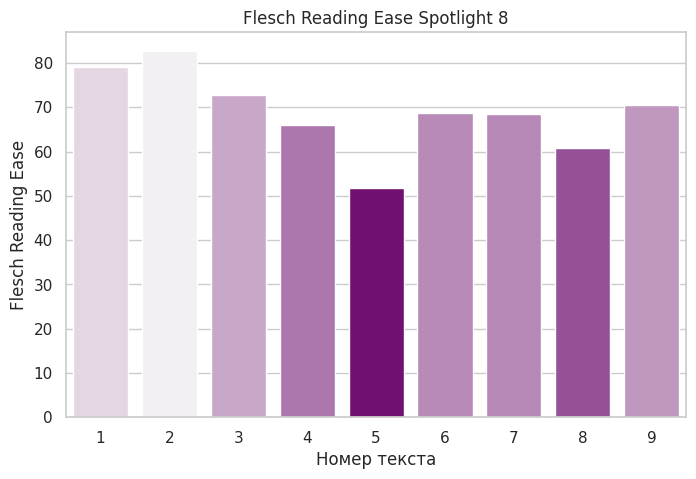

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid", font="DejaVu Sans")

#Столбчатая диаграмма Flesch Reading Ease с градиентом
plt.figure(figsize=(8,5))

# Создаем градиент цветов: чем ниже FRE, тем темнее
fre_values = df_all['Flesch Reading Ease']
norm = (fre_values.max() - fre_values) / (fre_values.max() - fre_values.min())  # нормируем для градиента 0-1
colors = sns.light_palette("red", n_colors=len(fre_values), reverse=False)
# Можно подставить цвета согласно нормированным значениям
colors = [sns.light_palette("purple", as_cmap=True)(v) for v in norm]

sns.barplot(x='Класс', y='Flesch Reading Ease', data=df_all, palette=colors)
plt.title('Flesch Reading Ease Spotlight 8')
plt.ylabel('Flesch Reading Ease')
plt.xlabel('Номер текста')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('vocab.csv', encoding='utf-16')
level_counts = df.groupby('level')['count'].sum().sort_index()

# Цвета через seaborn
palette = sns.color_palette("Set2", n_colors=len(level_counts))

# Круговая диаграмма с вынесенными подписями
plt.figure(figsize=(8,8))
plt.pie(
    level_counts,
    labels=None,  # убираем подписи на слайсах
    startangle=140,
    colors=palette
)
plt.legend(
    labels=[f"{lvl}: {cnt} ({cnt/sum(level_counts)*100:.1f}%)"
            for lvl, cnt in zip(level_counts.index, level_counts)],
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)
plt.axis('equal')
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: 'vocab.csv'

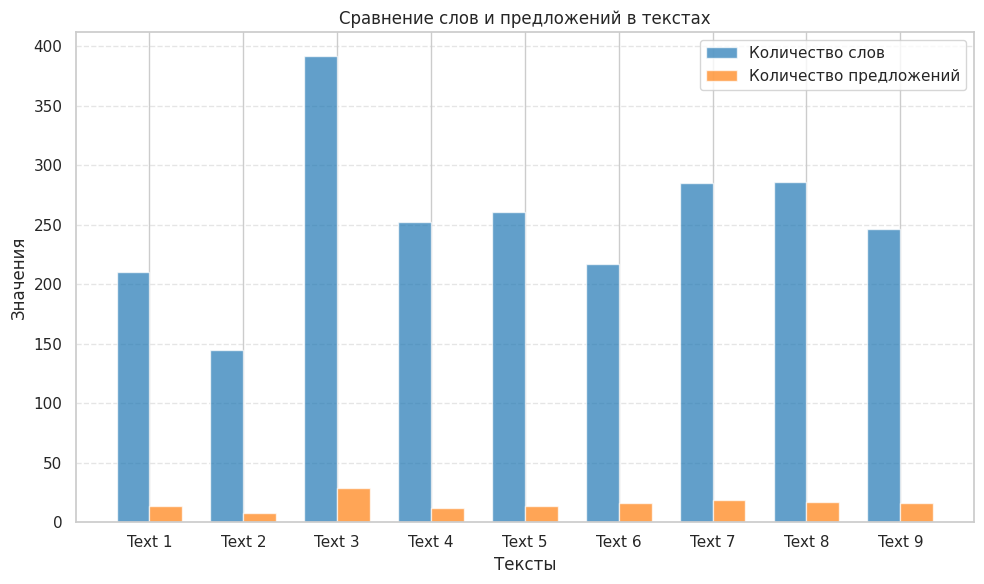

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#  Данные
data = {
    "Text": [f"Text {i}" for i in range(1, 10)],
    "Total words": [210, 145, 392, 252, 261, 217, 285, 286, 246],
    "Total sentences": [14, 8, 29, 12, 14, 16, 19, 17, 16]
}

df = pd.DataFrame(data)

# Столбчатая диаграмма
x = np.arange(len(df["Text"]))  # позиции для текстов
width = 0.35  # ширина столбиков

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, df["Total words"], width, label="Количество слов", color="tab:blue", alpha=0.7)
plt.bar(x + width/2, df["Total sentences"], width, label="Количество предложений", color="tab:orange", alpha=0.7)

plt.title("Сравнение слов и предложений в текстах")
plt.xlabel("Тексты")
plt.ylabel("Значения")
plt.xticks(x, df["Text"])
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5, axis="y")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Данные
data = {
    'Text1': {'A1':79, 'A2':9, 'B1':3, 'B2':4, 'C1':1, 'C2':1, 'Off-List':3},
    'Text2': {'A1':76, 'A2':12, 'B1':10, 'B2':1, 'C1':0, 'C2':0, 'Off-List':1},
    'Text3': {'A1':64, 'A2':14, 'B1':8, 'B2':2, 'C1':1, 'C2':1, 'Off-List':11},
    'Text4': {'A1':58, 'A2':12, 'B1':7, 'B2':4, 'C1':0, 'C2':2, 'Off-List':17},
    'Text5': {'A1':62, 'A2':12, 'B1':9, 'B2':8, 'C1':2, 'C2':1, 'Off-List':6},
    'Text6': {'A1':69, 'A2':6, 'B1':10, 'B2':4, 'C1':1, 'C2':2, 'Off-List':8},
    'Text7': {'A1':62, 'A2':14, 'B1':7, 'B2':2, 'C1':2, 'C2':1, 'Off-List':11},
    'Text8': {'A1':67, 'A2':11, 'B1':7, 'B2':2, 'C1':1, 'C2':1, 'Off-List':12},
    'Text9': {'A1':66, 'A2':13, 'B1':12, 'B2':2, 'C1':0, 'C2':1, 'Off-List':6},
}

# Создаем DataFrame
df = pd.DataFrame(data).T
df.index.name = 'Text'
df_percent = df.round(1)

# Сохраняем в Excel
df_percent.to_excel('CEFR_distribution.xlsx', sheet_name='CEFR Levels')

print("Таблица сохранена в файл 'CEFR_distribution.xlsx'.")


Таблица сохранена в файл 'CEFR_distribution.xlsx'.
